# Machine Learning Analysis (Heavy Dataset)

## Table of Contents

### Sections:
1. Data Preprocessing  
   - Selecting necessary columns, handling categorical variables, scaling data.  
2. Train-Test Split  
   - Splitting the data into training and testing datasets.  
3. Initial Model Selection  
   - Trying basic models like Linear Regression and Decision Trees.  
4. Model Tuning  
   - Improving model performance using hyperparameter tuning.  
5. Model Visualizations  
   - Understanding the model results using visualizations.  


## Overview

In this notebook, we will prepare the data for machine learning models.  
We have already performed the following preprocessing steps in our earlier notebooks:  
1. **EDA**: Initial exploration to understand the data.  
2. **Data Cleaning**:  
   - Created a new column: `price_per_sqft` (price per square foot).  
   - Categorized zip codes into regions.  
   - Handled outliers using the IQR method.  
   - Normalized numerical features like `price` and `livingArea` using Min-Max Scaling.  

Here, we will recap the previous steps and focus on **additional preprocessing** for machine learning models, such as:  
- Feature selection.  
- Handling categorical variables.  
- Engineering new features.  


In [27]:
#Imports 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
#Loading the Clean & Transformed Data
path = ('../data/heavy_cleaned_real_estate_data.csv')
heavy_real_estate_data = pd.read_csv(path)

In [4]:
#Pull code from data cleaning notebook
#Create a new feature: price per square foot
#heavy_reduced_df['price_per_sqft'] = heavy_reduced_df['price'] / heavy_reduced_df['livingArea']

# # Example: Categorize zip codes into regions (Optional)
# heavy_reduced_df['region'] = heavy_reduced_df['zipcode'].apply(lambda x: 'region_1' if x.startswith('84') else 'region_2')

In [5]:
#Outlier Test using IQR

# #Calculate Q1 (25th percentile) and Q3 (75th percentile)
# Q1 = reduced_df['price'].quantile(0.25)
# Q3 = reduced_df['price'].quantile(0.75)

# #Calculate IQR
# IQR = Q3 - Q1

# #Define lower and upper bounds for outliers
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# #Filter the dataset to remove outliers
# reduced_df = reduced_df[(reduced_df['price'] >= lower_bound) & (reduced_df['price'] <= upper_bound)]

# #Print bounds for verification
# print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

In [6]:
# # Normalize numerical columns
# scaler = MinMaxScaler()
# numerical_cols = ['bedrooms', 'bathrooms', 'livingArea', 'lotSize', 'daysOnZillow', 
#                   'latitude', 'longitude', 'monthlyHoaFee', 'age_of_property']
# X[numerical_cols] = scaler.fit_transform(X[numerical_cols])


### Additional Preprocessing Steps for mL Models

We will now handle categorical variables, select necessary features, and engineer new features:  
1. **Feature Selection**:  
   Selecting only the columns relevant for machine learning:  
   - `bedrooms`, `bathrooms`, `price`, `yearBuilt`, `lotSize`, `livingArea`, `daysOnZillow`, `latitude`, `longitude`, `monthlyHoaFee`.  

2. **Handling Categorical Variables**:  
   - Convert `homeType` into one-hot encoded columns for model compatibility.  

3. **Feature Engineering**:  
   - Add interaction terms like `bedrooms_to_bathrooms_ratio`.  
   - Derive new columns like `age_of_property = current_year - yearBuilt`.  


In [7]:
#Feature selection: 
selected_features = ['bedrooms', 'bathrooms', 'price', 'yearBuilt', 'lotSize', 
                     'livingArea', 'daysOnZillow', 'latitude', 'longitude', 'monthlyHoaFee']
ml_data = heavy_real_estate_data[selected_features].copy()


In [8]:
#Handling Categorical Variables
#One-hot encode 'homeType'
home_type_encoded = pd.get_dummies(heavy_real_estate_data['homeType'], prefix='homeType')
ml_data = pd.concat([ml_data, home_type_encoded], axis=1)

In [9]:
#Feature Engineering
#Add a bedrooms-to-bathrooms ratio
ml_data['bedrooms_to_bathrooms_ratio'] = ml_data['bedrooms'] / ml_data['bathrooms']

In [10]:
#Calculate the age of the property
current_year = 2024  # Replace with the actual year of analysis
ml_data['age_of_property'] = current_year - ml_data['yearBuilt']


In [11]:
# Check the final processed dataset
ml_data.head()

,bedrooms,bathrooms,price,yearBuilt,lotSize,livingArea,daysOnZillow,latitude,longitude,monthlyHoaFee,homeType_APARTMENT,homeType_CONDO,homeType_LOT,homeType_MANUFACTURED,homeType_MULTI_FAMILY,homeType_SINGLE_FAMILY,homeType_TOWNHOUSE,bedrooms_to_bathrooms_ratio,age_of_property
0,3.0,2.0,849500,1907.0,1499.000000,1950.0,0,38.91071,-77.01239,0.0,False,False,False,False,False,False,True,1.5,117.0
1,3.0,3.0,925000,1912.0,1008.000000,1360.0,4,38.89662,-76.99799,0.0,False,False,False,False,False,False,True,1.0,112.0
2,5.0,5.0,1069000,1910.0,1254.000000,2344.0,1,38.93392,-77.02516,0.0,False,False,False,False,False,True,False,1.0,114.0
3,1.0,2.0,860000,2020.0,9278.752392,883.0,0,38.86450,-77.01182,774.0,False,True,False,False,False,False,False,0.5,4.0
4,2.0,2.0,324900,1920.0,9278.752392,1001.0,553,38.93954,-77.03383,0.0,False,False,False,False,False,False,True,1.0,104.0


In [12]:
#Features and target
X = ml_data[['bedrooms', 'bathrooms', 'livingArea', 'lotSize', 'latitude', 'longitude', 'monthlyHoaFee', 'daysOnZillow']]  # 'price' is the target
y = ml_data['price']  # Target variable for regression


### Train-Test Split

We split our data into two parts:  
- **Training Set (80%)**: Used to train the model.  
- **Testing Set (20%)**: Used to check how well the model works on new data.  
This helps us avoid overfitting (when the model performs well on training data but poorly on unseen data).


In [13]:
#Splitting Data for Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (4144, 8)
Testing data shape: (1037, 8)


### Machine Learning Model Training (Shotgun Approach)
In this section, we will evaluate several base machine learning models to understand which one performs best. We will use the following models:

- Linear Regression: A simple model that predicts a straight-line relationship between features and target.  
- Decision Tree Regressor: A model that splits data into branches based on feature values.  
- Random Forest Regressor
- Support Vector Machine Regressor (SVR)

We will assess their performance using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R² to determine which model works best for predicting property prices.

In [14]:
#Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "SVM": SVR(kernel='rbf')
}



In [15]:
#Dictionary to store metrics
model_results = {}

In [16]:
#Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)  # Train the model
    predictions = model.predict(X_test)  # Make predictions

    # Evaluate the model
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    # Store results
    model_results[model_name] = {
        "Mean Absolute Error": mae,
        "Mean Squared Error": mse,
        "R² Score": r2
    }
    
    

Training Linear Regression...
Training Decision Tree...
Training Random Forest...


Training SVM...


In [17]:
#Print the results
print("Model Performance:")
for model_name, metrics in model_results.items():
    print(f"\n{model_name}:")
    for metric_name, metric_value in metrics.items():
        print(f"  {metric_name}: {metric_value:.4f}")


Model Performance:

Linear Regression:
  Mean Absolute Error: 566707.1920
  Mean Squared Error: 747658639749.5642
  R² Score: 0.5586

Decision Tree:
  Mean Absolute Error: 340443.7872
  Mean Squared Error: 857907615502.3469
  R² Score: 0.4935

Random Forest:
  Mean Absolute Error: 250602.0674
  Mean Squared Error: 352662478109.0721
  R² Score: 0.7918

SVM:
  Mean Absolute Error: 792118.7585
  Mean Squared Error: 1973501897163.2966
  R² Score: -0.1652


- Linear Regression: This model explains 55.86% of the variance in the data (R² = 0.5586) but has high errors (MAE = 566,707, MSE = 747.66 billion), indicating it struggles with capturing non-linear relationships in the dataset.
- Decision Tree: The model captures less variance than Linear Regression (R² = 0.4935) but achieves lower errors (MAE = 340,444). This suggests overfitting, as it may be too focused on the training data.
- Random Forest: With an R² of 0.7918 and low MAE (250,602), this ensemble model performs significantly better, balancing accuracy and generalization, and is the best-performing model.
- Support Vector Machine (SVM): The model performs poorly with an R² of -0.1652, indicating it fails to capture meaningful patterns in the data, and its errors are the highest (MAE = 792,119).

### Hyperparameter Tuning and Model Optimization
- Once we have selected the best-performing base models, we will tune their hyperparameters to improve performance.
- Hyperparameter tuning can significantly improve model accuracy by adjusting parameters such as the number of trees in a Random Forest or the kernel type in an SVM.
- We will use GridSearchCV for exhaustive hyperparameter tuning and cross-validation to ensure the model generalizes well.

When the R² score is already 1 for the other models (Linear Regression, Decision Tree, and Random Forest), hyperparameter tuning might not add value unless overfitting is suspected. However, the SVM model needs improvement because of its relatively low R².

In [23]:
#Random Forest Hyperparameter Tuning
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, cv=5, scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train, y_train)

# Best Random Forest model
best_rf_model = rf_grid_search.best_estimator_

# Evaluate the tuned Random Forest model
y_pred_rf_tuned = best_rf_model.predict(X_test)
mae_rf_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)
mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

print(f"Tuned Random Forest: MAE = {mae_rf_tuned:.2f}, MSE = {mse_rf_tuned:.2f}, R2 = {r2_rf_tuned:.2f}")


Tuned Random Forest: MAE = 251647.20, MSE = 360921300026.37, R2 = 0.79


Tuned Random Forest: After tuning, the model maintains similar performance (R² = 0.79, MAE = 251,647) but with slight improvements in error metrics. Its consistent accuracy reinforces its suitability for this problem, especially with "bathrooms" and "living area" as the most influential features.


In [24]:
#Decision Tree Hyperparameter Tuning
dt_param_grid = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_param_grid, cv=5, scoring='neg_mean_squared_error')
dt_grid_search.fit(X_train, y_train)

# Best Decision Tree model
best_dt_model = dt_grid_search.best_estimator_

# Evaluate the tuned Decision Tree model
y_pred_dt_tuned = best_dt_model.predict(X_test)
mae_dt_tuned = mean_absolute_error(y_test, y_pred_dt_tuned)
mse_dt_tuned = mean_squared_error(y_test, y_pred_dt_tuned)
r2_dt_tuned = r2_score(y_test, y_pred_dt_tuned)

print(f"Tuned Decision Tree: MAE = {mae_dt_tuned:.2f}, MSE = {mse_dt_tuned:.2f}, R2 = {r2_dt_tuned:.2f}")


Tuned Decision Tree: MAE = 303059.68, MSE = 499007016535.75, R2 = 0.71


 Hyperparameter tuning significantly improves the model's generalization (R² = 0.71, MAE = 303,060), narrowing the gap between it and the Random Forest, though still slightly less effective.

In [26]:
#SVM Hyperparameter Tuning
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm_grid_search = GridSearchCV(SVR(), svm_param_grid, cv=5, scoring='neg_mean_squared_error')
svm_grid_search.fit(X_train, y_train)

# Best SVM model
best_svm_model = svm_grid_search.best_estimator_

# Evaluate the tuned SVM model
y_pred_svm_tuned = best_svm_model.predict(X_test)
mae_svm_tuned = mean_absolute_error(y_test, y_pred_svm_tuned)
mse_svm_tuned = mean_squared_error(y_test, y_pred_svm_tuned)
r2_svm_tuned = r2_score(y_test, y_pred_svm_tuned)

print(f"Tuned SVM: MAE = {mae_svm_tuned:.2f}, MSE = {mse_svm_tuned:.2f}, R2 = {r2_svm_tuned:.2f}")


Tuned SVM: MAE = 548802.17, MSE = 1072715955197.62, R2 = 0.37


In [28]:
# Linear Regression with Cross-Validation

linreg_model = LinearRegression()
cv_scores = cross_val_score(linreg_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

linreg_model.fit(X_train, y_train)
y_pred_linreg = linreg_model.predict(X_test)
mae_linreg = mean_absolute_error(y_test, y_pred_linreg)
mse_linreg = mean_squared_error(y_test, y_pred_linreg)
r2_linreg = r2_score(y_test, y_pred_linreg)

print(f"Linear Regression: MAE = {mae_linreg:.2f}, MSE = {mse_linreg:.2f}, R2 = {r2_linreg:.2f}")


Linear Regression: MAE = 566707.19, MSE = 747658639749.56, R2 = 0.56


### Model Evaluation & Visualization
- After hyperparameter tuning, we evaluate the final model's performance.
- We will use relevant evaluation metrics (e.g., MAE, MSE, R²) and plot learning curves to visualize how the model performs during training and validation.
- We will also generate other useful visualizations, such as residual plots and feature importance charts, to understand how the model makes predictions and which features are most influential.


In [29]:
#Compile metrics into a dictionary
metrics = {
    "Model": ["Linear Regression", "Decision Tree", "Random Forest", "SVM"],
    "MAE": [mae_linreg, mae_dt_tuned, mae_rf_tuned, mae_svm_tuned],
    "MSE": [mse_linreg, mse_dt_tuned, mse_rf_tuned, mse_svm_tuned],
    "R2": [r2_linreg, r2_dt_tuned, r2_rf_tuned, r2_svm_tuned]
}

In [30]:
#Create a DataFrame
metrics_df = pd.DataFrame(metrics)


/var/folders/p9/l56kxrqj1f50k63kvkm8k0nm0000gp/T/ipykernel_94373/1279306998.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_df, x='Model', y='MAE', palette='Blues_d')


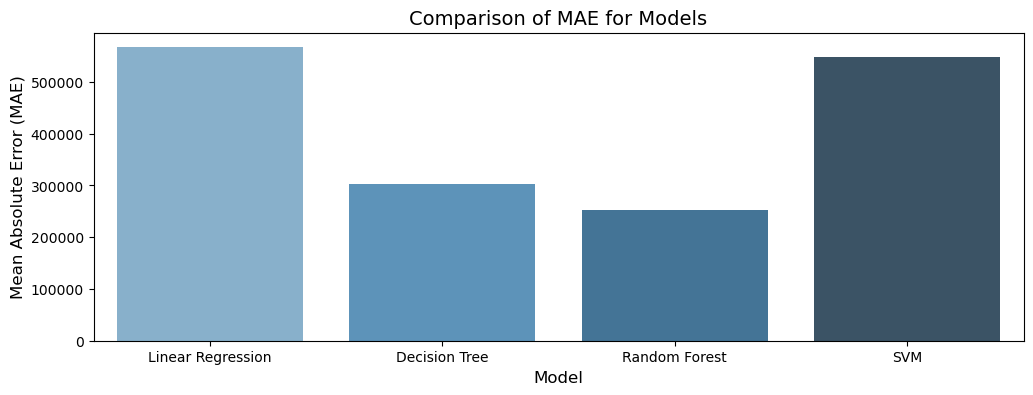

In [31]:
#MAE Comparison
plt.figure(figsize=(12, 4))
sns.barplot(data=metrics_df, x='Model', y='MAE', palette='Blues_d')
plt.title('Comparison of MAE for Models', fontsize=14)
plt.ylabel('Mean Absolute Error (MAE)', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.show()


/var/folders/p9/l56kxrqj1f50k63kvkm8k0nm0000gp/T/ipykernel_94373/606310272.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_df, x='Model', y='MSE', palette='Greens_d')


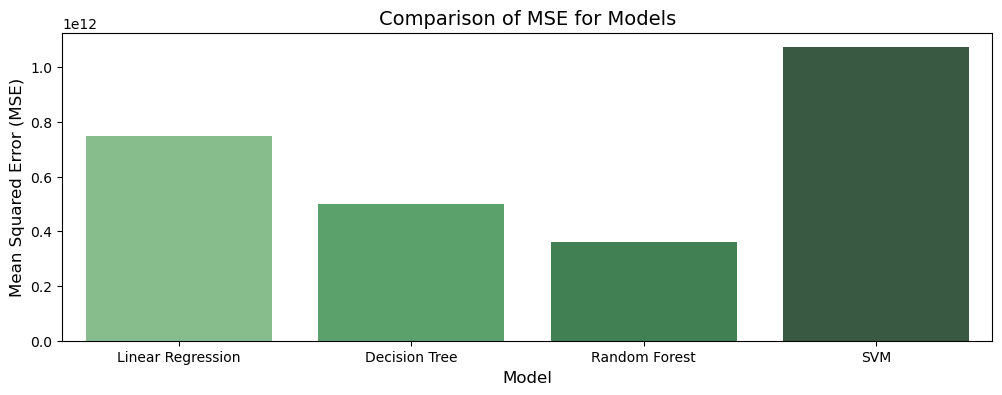

In [32]:
#MSE Comparison
plt.figure(figsize=(12, 4))
sns.barplot(data=metrics_df, x='Model', y='MSE', palette='Greens_d')
plt.title('Comparison of MSE for Models', fontsize=14)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.show() 

/var/folders/p9/l56kxrqj1f50k63kvkm8k0nm0000gp/T/ipykernel_94373/1670412328.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_df, x='Model', y='R2', palette='Reds_d')


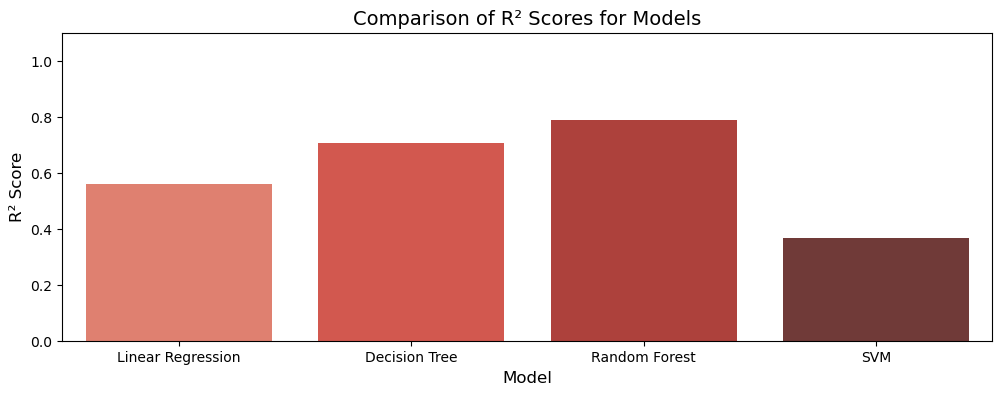

In [33]:
#R² Score Comparison
plt.figure(figsize=(12, 4))
sns.barplot(data=metrics_df, x='Model', y='R2', palette='Reds_d')
plt.title('Comparison of R² Scores for Models', fontsize=14)
plt.ylabel('R² Score', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.ylim(0, 1.1)  # Ensures a clear view of the R² range
plt.show()

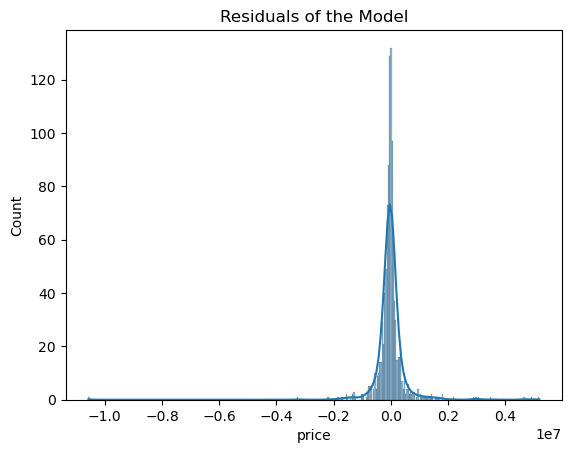

In [35]:
#Visualizing residuals
y_pred = best_rf_model.predict(X_test)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Residuals of the Model')
plt.show()

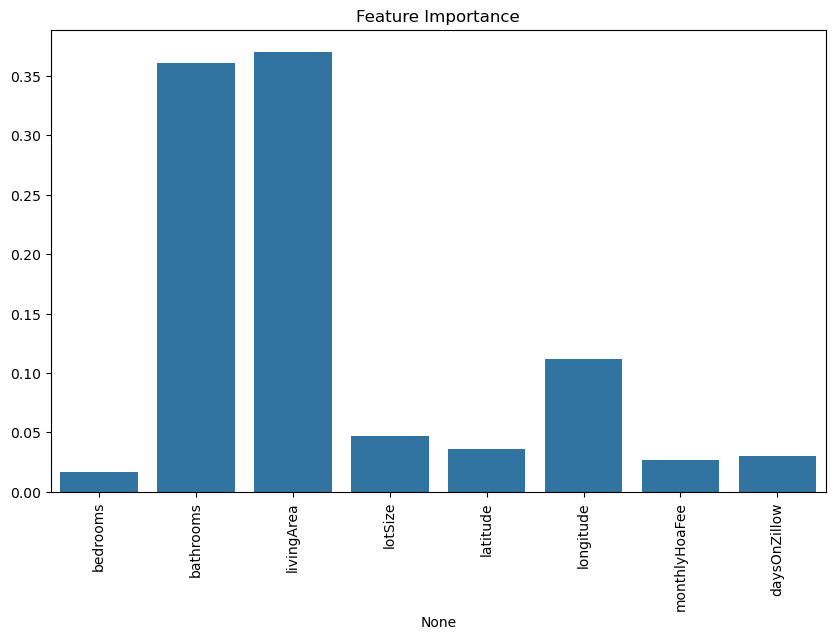

In [36]:
#Feature importance plot (for Random Forest)
feature_importances = best_rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=features, y=feature_importances)
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()